In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
###selection tournament size=3
###crossover single point
###mutation  flip bit

In [27]:
CHROMOSOME_SIZE = 100
POPULATION_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATION = 100

In [28]:
POPULATION = np.random.randint(0,2,size=(POPULATION_SIZE,CHROMOSOME_SIZE)).astype('bool')

In [29]:
def fitness(POP):
    fitness_vals = np.zeros(shape=(POP.shape[0],))
    for i in range(POP.shape[0]):
        fitness_vals[i] = np.sum(POP[i])
    return fitness_vals

In [30]:
def tournament_select(POP,scores,TSIZE):
    NEW_POPULATION = []
    while len(NEW_POPULATION) != len(POP):
        TOURNAMENT_SELECTS_INDICES = []
        TOURNAMENT_SELECTS_SCORES = []
        while(len(TOURNAMENT_SELECTS_INDICES) != TSIZE):
            ti = np.random.randint(0,len(POP))
            TOURNAMENT_SELECTS_INDICES.append(ti)
            TOURNAMENT_SELECTS_SCORES.append(scores[ti])
        winner = np.argmax(TOURNAMENT_SELECTS_SCORES)
        NEW_POPULATION.append(TOURNAMENT_SELECTS_INDICES[winner])
    return np.array(NEW_POPULATION)

In [31]:
def mutation(POP,P_MUTATION):
    for i in range(POP.shape[0]):
        for j in range(POP[i].shape[0]):
            if np.random.uniform() <= P_MUTATION:
                POP[i][j] = ~POP[i][j]
    return POP

In [32]:
def cross_over(POP,P_CROSSOVER,selections):
    NEW_POPULATION = []
    while(len(NEW_POPULATION) != len(POP)):
        indiv1 = selections[np.random.randint(0,len(selections))]
        indiv2 = selections[np.random.randint(0,len(selections))]
        if np.random.uniform() > P_CROSSOVER:
            NEW_POPULATION.append(POP[indiv1])
            NEW_POPULATION.append(POP[indiv2])
        else:
            pt = np.random.randint(0,POP[0].shape[0])
            indiv1 = POP[indiv1]
            indiv2 = POP[indiv2]
            new_indiv1 = np.concatenate((indiv1[0:pt],indiv2[pt:]))
            new_indiv2 = np.concatenate((indiv2[0:pt],indiv1[pt:]))
            NEW_POPULATION.append(new_indiv1)
            NEW_POPULATION.append(new_indiv2)
    return np.array(NEW_POPULATION)

In [33]:
AVERAGE_FITNESS = []
BEST_FITNESS = []

In [34]:
for _ in range(MAX_GENERATION):
    fitness_scores = fitness(POPULATION)
    AVERAGE_FITNESS.append(np.mean(fitness_scores))
    BEST_FITNESS.append(np.max(fitness_scores))
    selections = tournament_select(POPULATION,fitness_scores,10)
    POPULATION = cross_over(POPULATION,P_CROSSOVER,selections)
    POPULATION = mutation(POPULATION,P_MUTATION)

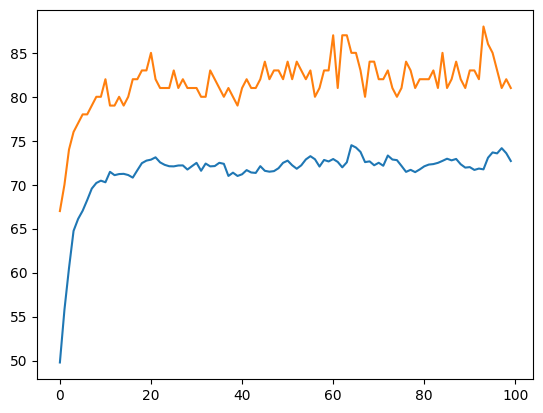

In [35]:
plt.plot(AVERAGE_FITNESS)
plt.plot(BEST_FITNESS)
plt.show()